In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

#from sklearn.cross_validation import KFold, cross_val_score, train_test_split


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset

In [2]:
data = pd.read_csv("Breast_Cancer_Wisconsin_Data.csv")
data = pd.DataFrame(data)

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
data.shape

(569, 32)

## Performing Label Encoding 

In [6]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

data['diagnosis'].unique()     # Malignant = 1, Benign = 0

array([1, 0])

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Check for Null Values 

In [8]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Plotting charts to respective features 

<Axes: >

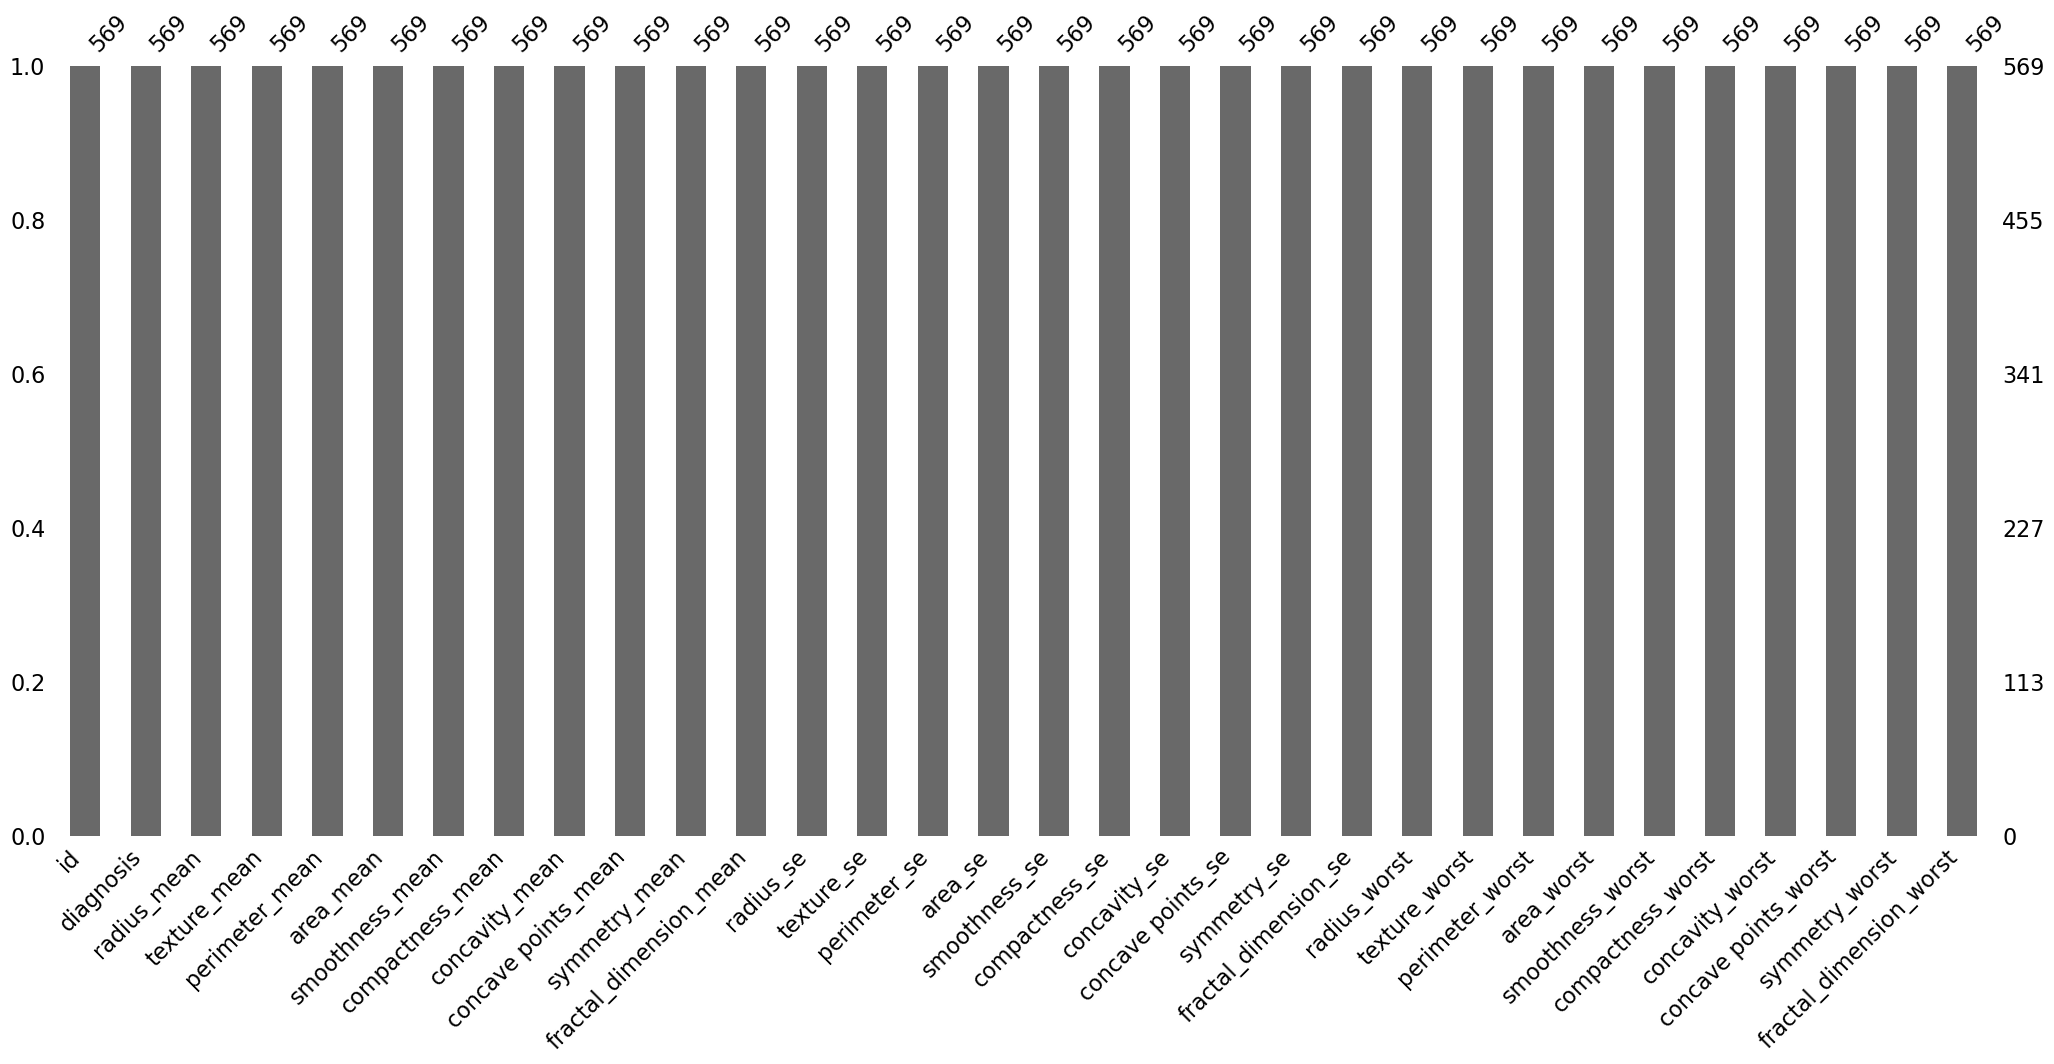

In [9]:
import missingno as msno

msno.bar(data)

<Axes: >

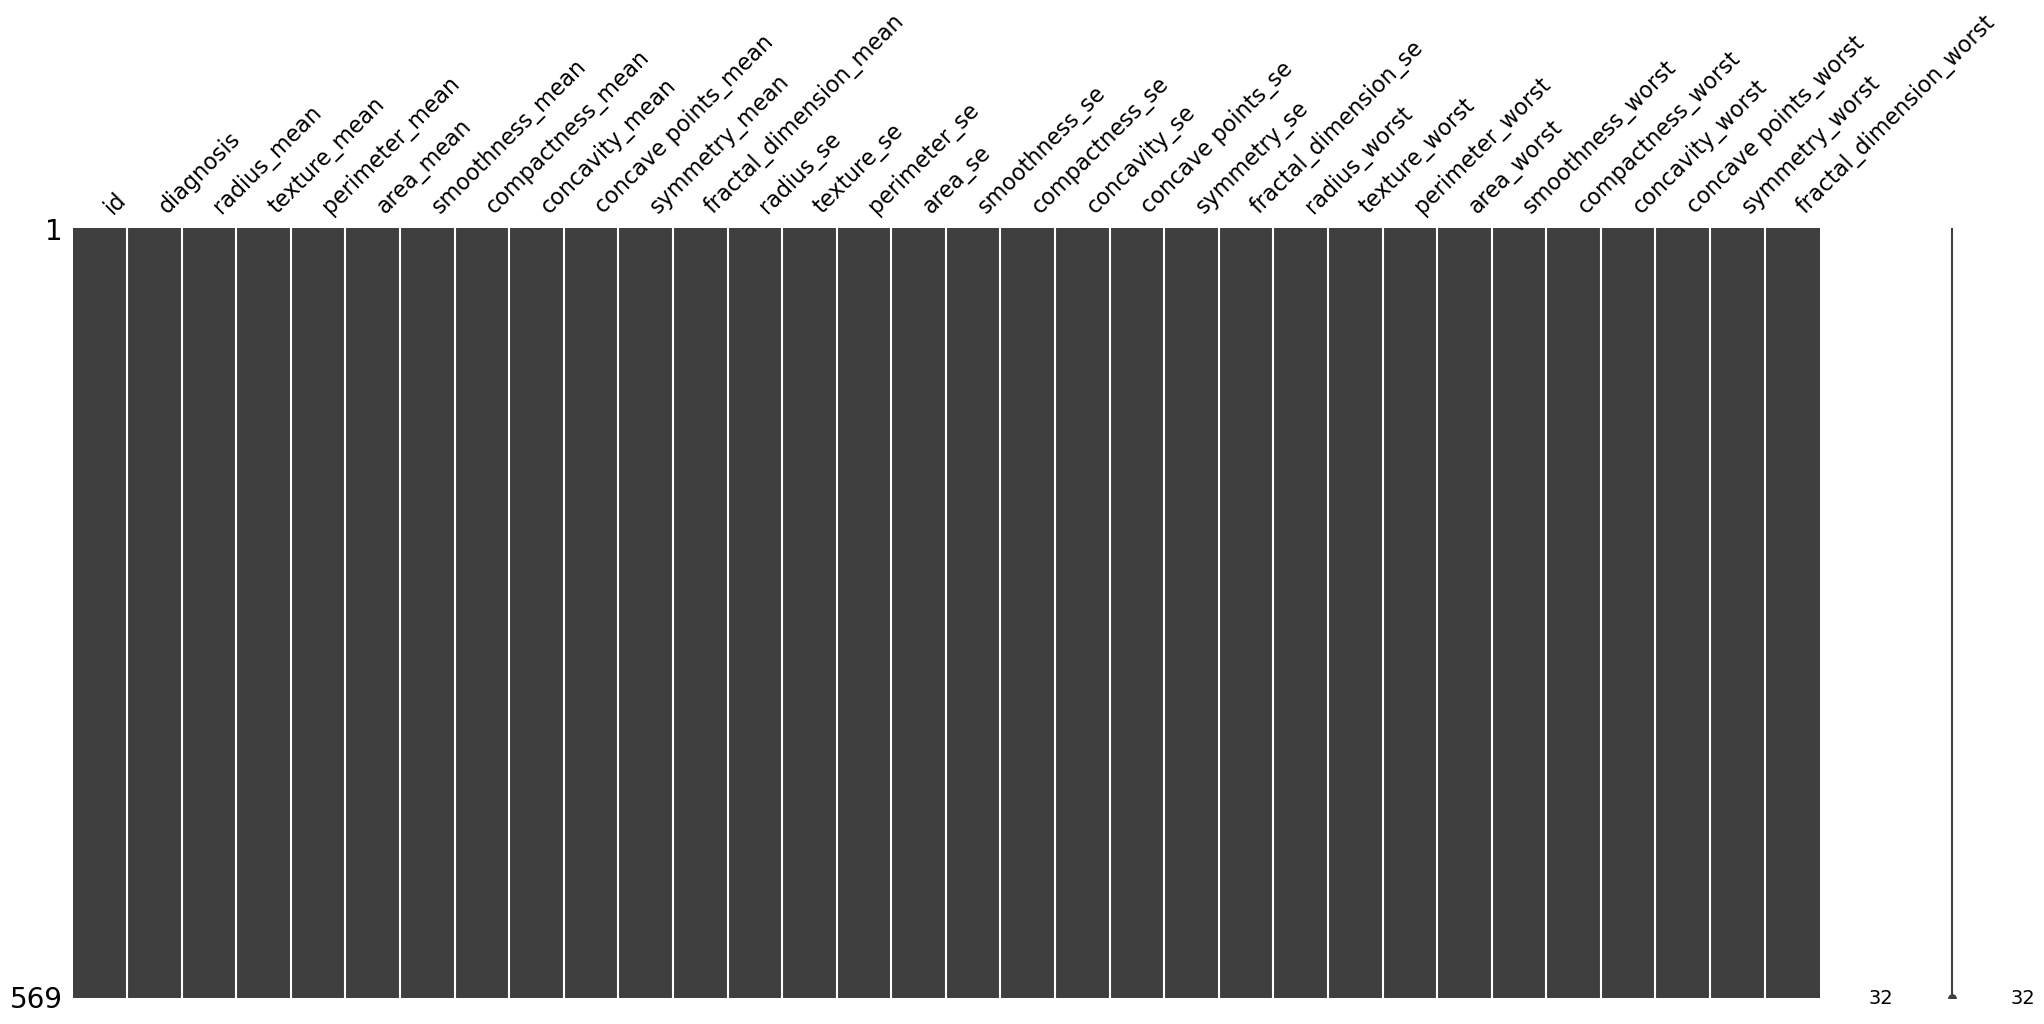

In [10]:
msno.matrix(data) 

## Summarisation

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


In [12]:
data.describe().T.style.bar(subset=['mean'], color='blue')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
diagnosis,569.000000,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200


## Checking for duplicate records 

In [13]:
dups = data.duplicated()

print(dups.any())

print(data[dups])

False
Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]


## Visualizing the data distribution in the diagnosis feature 

<Axes: xlabel='diagnosis', ylabel='count'>

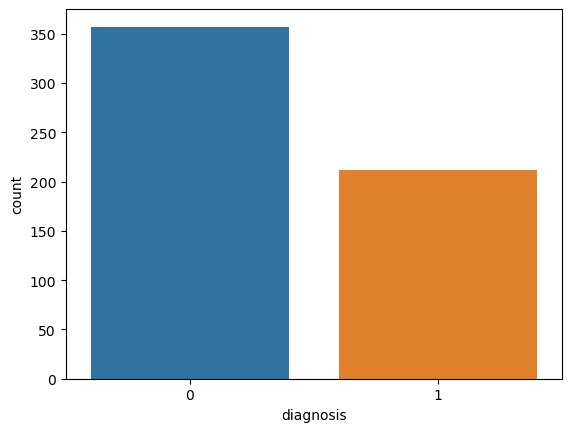

In [14]:
sns.countplot(x= 'diagnosis', linewidth = 5, data = data)

In [15]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Visualizing the correlation matrix between sets of features 

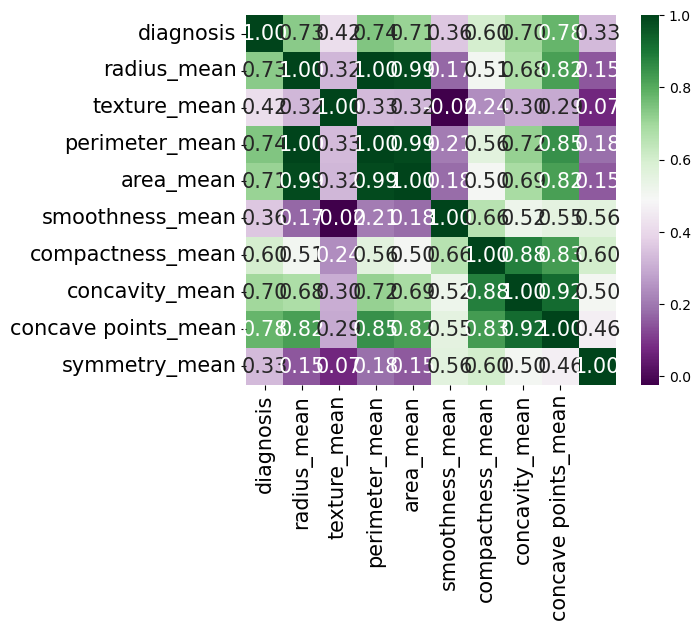

In [16]:
x = data.iloc[:, 1:]

features_mean = x.columns[:10]
features_se = x.columns[10:20]
features_worst = x.columns[20:]

corr = x[features_mean].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap =  'PRGn')
g.set_xticklabels(rotation=90, labels = features_mean, size = 15)
g.set_yticklabels(rotation=0, labels = features_mean, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (30,10)

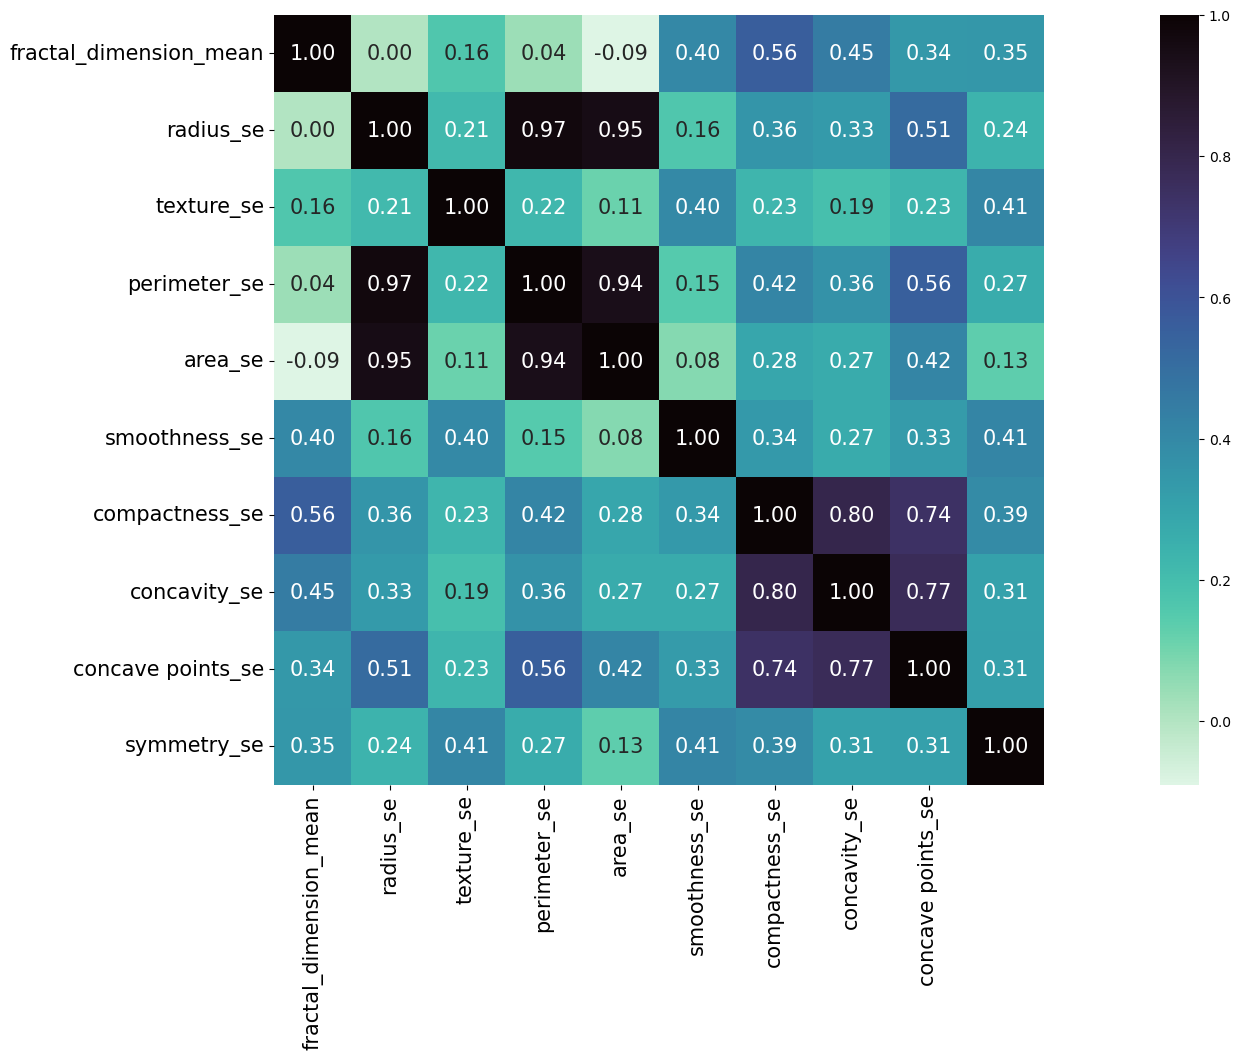

In [17]:
corr = x[features_se].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'mako_r')
g.set_xticklabels(rotation=90, labels = features_se, size = 15)
g.set_yticklabels(rotation=0, labels = features_se, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (30,10)

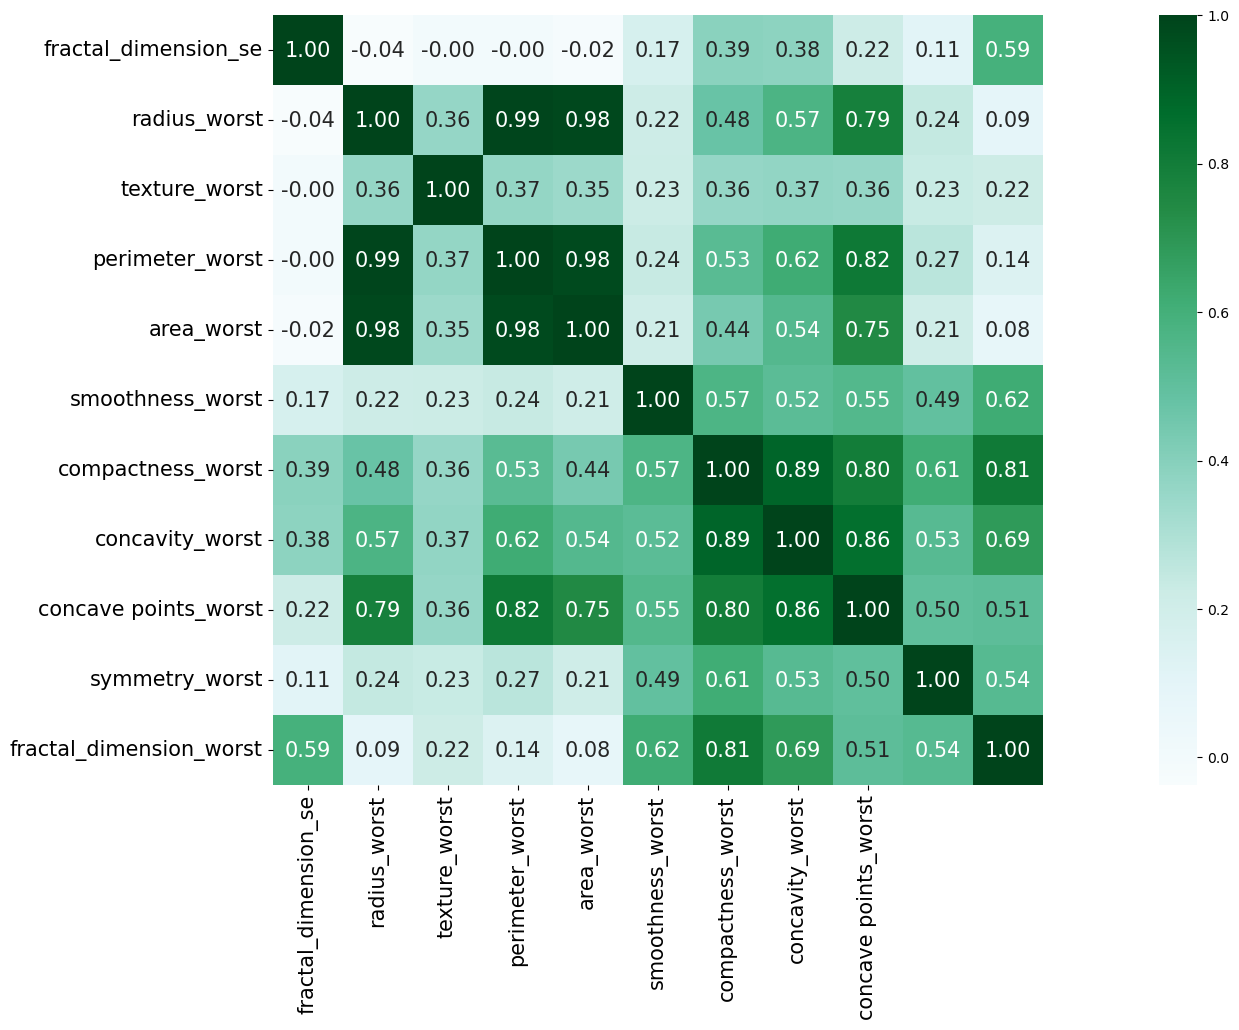

In [18]:
corr = x[features_worst].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'BuGn' )
g.set_xticklabels(      rotation=90, labels = features_worst, size = 15)
g.set_yticklabels(rotation=0, labels = features_worst, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (30,10)

## Seperate data in two parts bengin and malignant

In [19]:
dfM = data[data['diagnosis'] == 1]
dfB = data[data['diagnosis'] == 0]

# 0 = Bengin, 1 = Malignant

## Plotting the Histogram for the set of features 

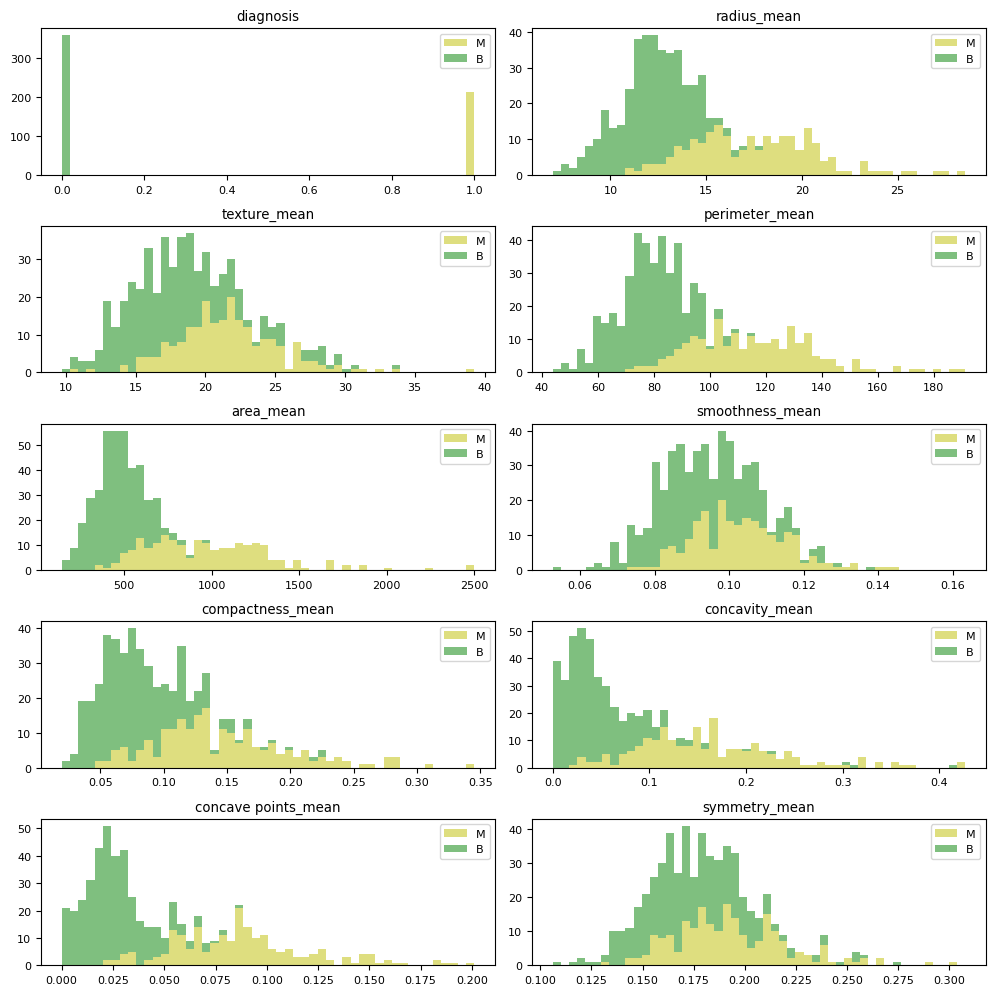

In [20]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[i]]) - min(data[features_mean[i]]))/50
    ax.hist([dfM[features_mean[i]],dfB[features_mean[i]]], bins=np.arange(min(data[features_mean[i]]), max(data[features_mean[i]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['y','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[i])
plt.tight_layout()
plt.show()

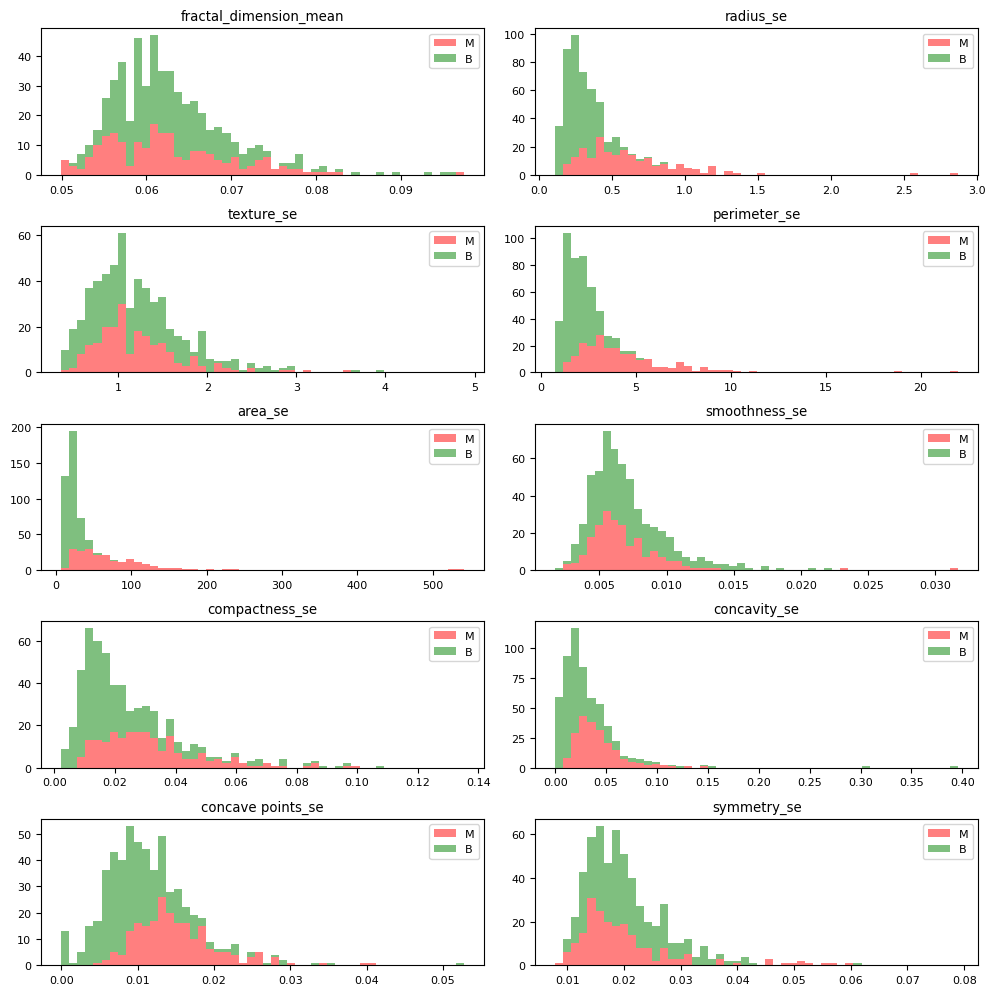

In [21]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_se[i]]) - min(data[features_se[i]]))/50
    ax.hist([dfM[features_se[i]],dfB[features_se[i]]], bins=np.arange(min(data[features_se[i]]), max(data[features_se[i]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_se[i])
plt.tight_layout()
plt.show()

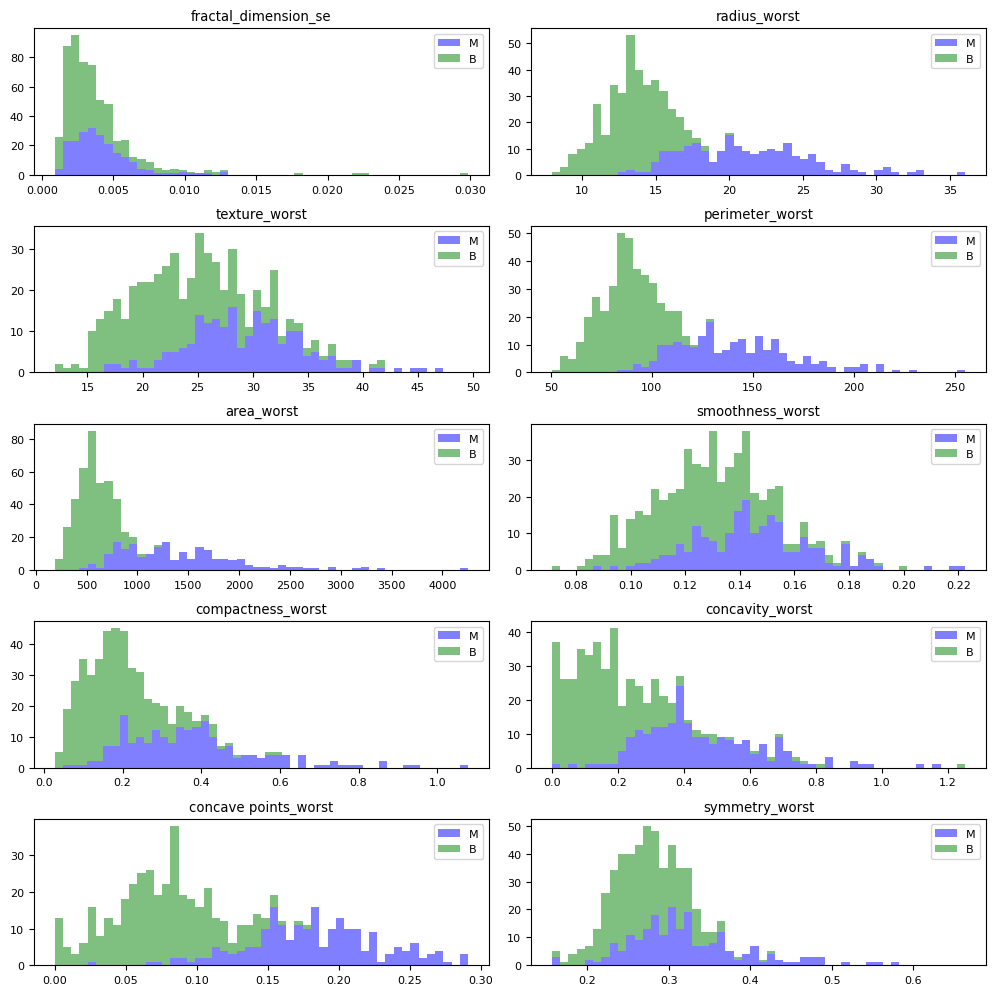

In [22]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_worst[i]]) - min(data[features_worst[i]]))/50
    ax.hist([dfM[features_worst[i]],dfB[features_worst[i]]], bins=np.arange(min(data[features_worst[i]]), max(data[features_worst[i]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_worst[i])
plt.tight_layout()
plt.show()

## Visualizing the heatmap for the set of features 

<Axes: >

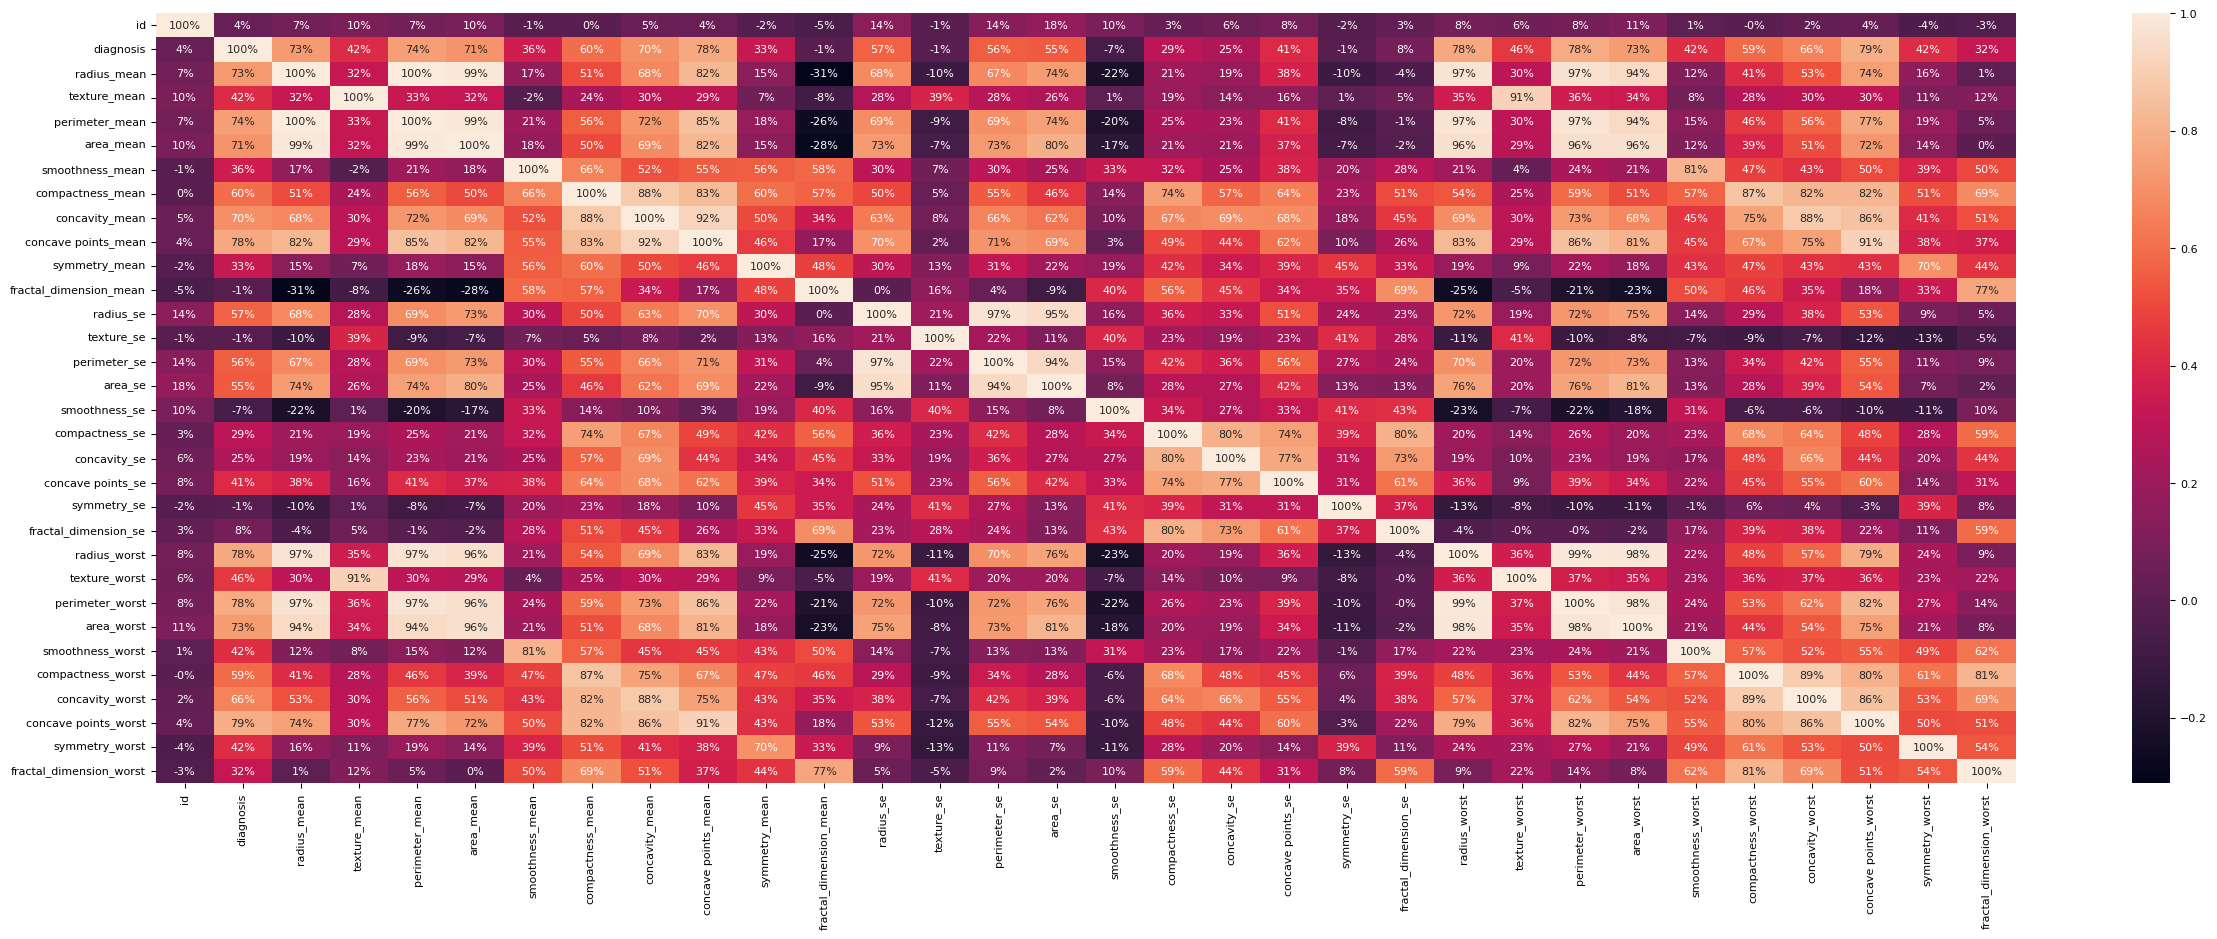

In [23]:
sns.heatmap(data.corr(),annot=True,fmt='.0%')

## Model Training 

In [24]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Dropping the id column, as it is not required 

In [25]:
data = data.drop(['id'], axis = 1)

In [26]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Converting the processed dataset ino a new csv file 

In [27]:
data.to_csv('Breast_cancer_Wisconsin_processed_data.csv', index = False)

## Dividing the dataset into two separate dataframes `

In [28]:
X = data.iloc[:, :-1]
Y = data.iloc[:,0]

In [29]:
X.shape

(569, 30)

In [30]:
Y.shape

(569,)

## Training and testing for the model

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Y_train

293    0
332    0
565    1
278    0
489    1
      ..
277    1
9      1
359    0
192    0
559    0
Name: diagnosis, Length: 426, dtype: int32

## Distribution of Breast Cancer in train data 

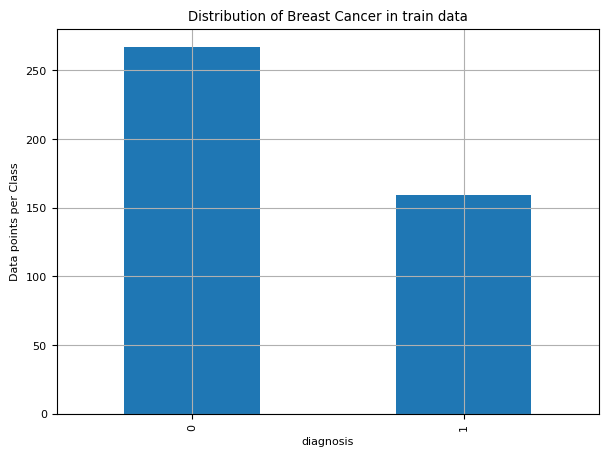

Number of data points in class 1 : 267 ( 46.924 %)
Number of data points in class 2 : 159 ( 27.944 %)


In [32]:
# This returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = Y_train.value_counts()
test_class_distribution = Y_test.value_counts()

# For Train set
figsize=(7,5)
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', figsize=figsize)
plt.xlabel('diagnosis')
plt.ylabel('Data points per Class')
plt.title('Distribution of Breast Cancer in train data')
plt.grid()
plt.show()

# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/data.shape[0]*100), 3), '%)')

## Distribution of Breast Cancer in test data 

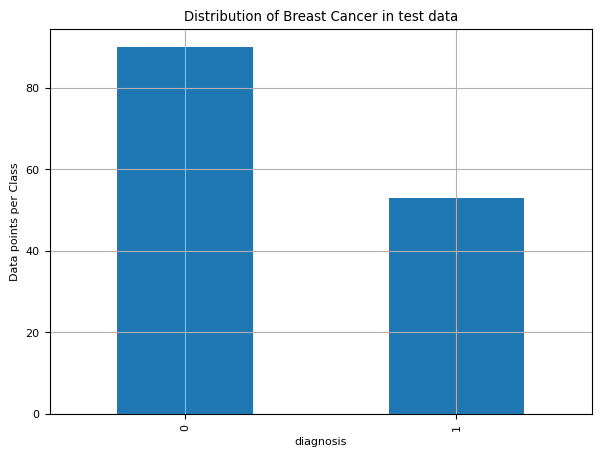

Number of data points in class 1 : 90 ( 15.817 %)
Number of data points in class 2 : 53 ( 9.315 %)


In [33]:
# For Test set
figsize=(7,5)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar', figsize=figsize)
plt.xlabel('diagnosis')
plt.ylabel('Data points per Class')
plt.title('Distribution of Breast Cancer in test data')
plt.grid()
plt.show()

# -(test_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/data.shape[0]*100), 3), '%)')

#### Defininig the algorithms as well as its accuracy 

In [34]:
algorithm=[]
algorithm_training_accuracy=[]

## Define the Machine Learning and Ensemble Learning Models in a function 

In [35]:
def models(X_train,Y_train):
  
  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)
  algorithm.append('Logistic Regression')
  algorithm_training_accuracy.append(log.score(X_train,Y_train))
  
  # Decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train,Y_train)
  algorithm.append('Decision tree')
  algorithm_training_accuracy.append(tree.score(X_train,Y_train))
  
  # Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest  = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)
  forest.fit(X_train,Y_train)
  algorithm.append('Random Forest')
  algorithm_training_accuracy.append(forest.score(X_train,Y_train))
  
  # K-Nearest Neighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier()
  knn.fit(X_train,Y_train)
  algorithm.append('K-Nearest Neighbors')
  algorithm_training_accuracy.append(knn.score(X_train,Y_train))
  
  #Linear Discriminant Analysis
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
  lda = LinearDiscriminantAnalysis()
  lda.fit(X_train,Y_train)
  algorithm.append('Linear Discriminant Analysis')
  algorithm_training_accuracy.append(lda.score(X_train,Y_train))
  
  # Bagging
  from sklearn.ensemble import BaggingClassifier
  bgg = BaggingClassifier()
  bgg.fit(X_train,Y_train)
  algorithm.append('Bagging')
  algorithm_training_accuracy.append(bgg.score(X_train,Y_train))
  
  # adaboost
  from sklearn.ensemble import AdaBoostClassifier
  ada = AdaBoostClassifier()
  ada.fit(X_train,Y_train)
  algorithm.append('AdaBoost')
  algorithm_training_accuracy.append(ada.score(X_train,Y_train))
  
  #Gradient boost
  from sklearn.ensemble import GradientBoostingClassifier
  grd = GradientBoostingClassifier()
  grd.fit(X_train, Y_train)
  algorithm.append('Gradient boost')
  algorithm_training_accuracy.append(grd.score(X_train,Y_train))
  
  # ExtraTreesClassifier
  from sklearn.ensemble import ExtraTreesClassifier
  ext = ExtraTreesClassifier()
  ext.fit(X_train,Y_train)
  algorithm.append('Extra Trees Classifier')
  algorithm_training_accuracy.append(ext.score(X_train,Y_train))
  
  # Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  Gau = GaussianNB()
  Gau.fit(X_train,Y_train)
  algorithm.append('Naive Bayes')
  algorithm_training_accuracy.append(Gau.score(X_train,Y_train))
  
  # Support Vector Machine
  from sklearn.svm import SVC
  V = SVC()
  V.fit(X_train,Y_train)
  algorithm.append('Support Vector Machine')
  algorithm_training_accuracy.append(V.score(X_train,Y_train))
  



  
  #Print the  model accuracy on the training data
  print("[0] Logistic Regression Training Accuracy :", log.score(X_train,Y_train))
  print("[1] Decision Tree Training Acuuracy :", tree.score(X_train,Y_train))
  print("[2] Random Forest Training Accuracy :", forest.score(X_train,Y_train))
  print("[3] K-Nearest Neighbors Training Accuracy :", knn.score(X_train,Y_train))
  print("[4] Linear Discriminant Analysis Training Accuracy :", lda.score(X_train,Y_train))
  
  print("[5] Bagging Training Accuracy :", bgg.score(X_train,Y_train))
  print("[6] adaboost Training Accuracy :", ada.score(X_train,Y_train))
  print("[7] Gradient Training Accuracy :", grd.score(X_train,Y_train))
  print("[8] ExtraTreesClassifier Training Accuracy :", ext.score(X_train,Y_train))
  print("[9] Gaussian Naive Bayes Training Accuracy :", Gau.score(X_train,Y_train))
  print("[10] Support Vector Machine Training Accuracy :", V.score(X_train,Y_train))
  
  
  return  log, tree, forest, knn, lda, bgg, ada, grd,ext,Gau,V
    

In [36]:
model = models(X_train,Y_train)

[0] Logistic Regression Training Accuracy : 0.9953051643192489
[1] Decision Tree Training Acuuracy : 1.0
[2] Random Forest Training Accuracy : 1.0
[3] K-Nearest Neighbors Training Accuracy : 0.9413145539906104
[4] Linear Discriminant Analysis Training Accuracy : 0.9647887323943662
[5] Bagging Training Accuracy : 1.0
[6] adaboost Training Accuracy : 1.0
[7] Gradient Training Accuracy : 1.0
[8] ExtraTreesClassifier Training Accuracy : 1.0
[9] Gaussian Naive Bayes Training Accuracy : 1.0
[10] Support Vector Machine Training Accuracy : 0.903755868544601


In [37]:
algorithm_training_accuracy

[0.9953051643192489,
 1.0,
 1.0,
 0.9413145539906104,
 0.9647887323943662,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.903755868544601]

## Visual Representation of the Training accuracy for the Machine Learning and Ensemble Learning Models

<Axes: title={'center': 'Training Accuracy Comparison'}, xlabel='<-----Accuracy----->', ylabel='<----Algorithm---->'>

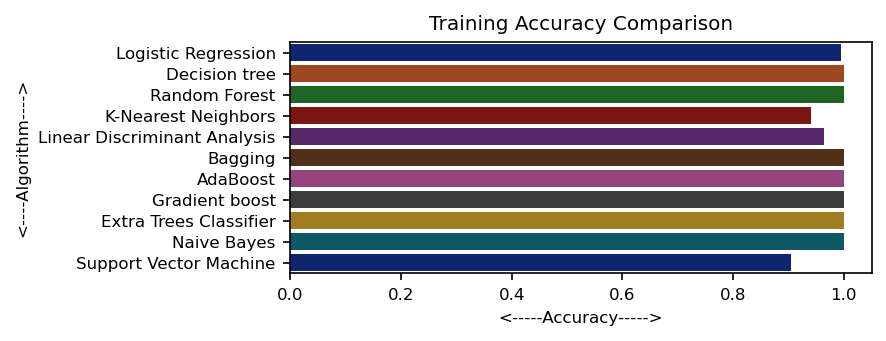

In [38]:
plt.figure(figsize=[5,2],dpi = 150)
plt.title('Training Accuracy Comparison')
plt.xlabel('<-----Accuracy----->')
plt.ylabel('<----Algorithm---->')
sns.barplot(x = algorithm_training_accuracy , y = algorithm , palette='dark')

In [39]:
algorithm=[]
algorithm_testing_accuracy=[]

## calculation of Confusion Matrix for making the classification report 

In [40]:
from sklearn.metrics import confusion_matrix
from numpy import sqrt 
from sklearn.metrics import matthews_corrcoef
n_classes=2
for i in range(len(model)):
  cm = confusion_matrix(Y_test,model[i].predict(X_test))
  # Calculating the TP,FP,FN,TN values
  for c in range(n_classes):
    TP = cm[c,c]
    FP = sum(cm[:,c]) - cm[c,c]
    FN = sum(cm[c,:]) - cm[c,c]
    TN = sum(np.delete(sum(cm)-cm[c,:],c))
    cm = confusion_matrix(Y_test,model[i].predict(X_test))

  # TP = cm[1][1]
  # TN = cm[0][0]
  # FN = cm[0][1]
  # FP = cm[1][0]
    

  if i==0:
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    FPR=FP/(FP+TN)
    F1_Measure=(Precision+Recall)/2
    Specificity=TN/(TN+FP)
    TNR=TN/(TN+FP)
    CSI=TP/(TP+FP+FN)
    FDP=FP/(FP+TP)
    BA=(TPR+TNR)/2
    BM=TPR+TNR-1 #calculate Bookmaker Informedness
    FMI = TP / sqrt((TP + FP) * (TP + FN))

    #calculate markedness or deltaP
    precision = cm[1, 1]/(cm[1,1] + cm[0, 1])
    negative_predictive_value = cm[0, 0]/(cm[0,0] + cm[1,0])
    MK = precision + negative_predictive_value - 1
#########
    NPV = TN/(TN+FN)
    FOR = FN/(FN+TN)
    PLR = Recall/FPR
    FNR = FN / (FN + TP)
    NLR=FNR/Specificity
    DOR = PLR/NLR
#############

    #calculate Matthews correlation coefficient
    # MCC=matthews_corrcoef(Y_test,log_Y_pred)
    print("Logistic Regression Model Classification Report")
    print(cm)
    print("Precision = ",Precision)
    print("Recall = ",Recall)
    print("F1_score = ",F1_score)
    print("False Positive Rate = ",FPR)
    print("F1 Measure = ",F1_Measure)
    print("Specificity = ",Specificity)
    print("Critical Success Index = ",CSI)
    print("False Discovery Rate = ",FDP)
    print("Balanced Accuracy = ",BA)
    print("Fowlkes-Mallows Index = ",FMI)
    print("Bookmaker Informedness = ",BM)

    ##########
    print("False Ommision Rate = ",FOR)
    print("Positive Likelihood Ratio = ",BM)
    print("Negetive Likelihood Ratio = ",BM)
    print("Bookmaker Informedness = ",BM)
    print("Bookmaker Informedness = ",BM)
    print("Bookmaker Informedness = ",BM)   

    #######
    # Evaluate the model on the client's test set
    # Y_pred = log.predict(X_test)
    # log_acc = accuracy_score(Y_test, Y_pred)
    #calculate Matthews correlation coefficient
    # MCC=matthews_corrcoef(Y_test,log_Y_pred)
    # print("Matthews Correlation Coefficient = ",MCC)
    print("Markedness = ",MK)
    log_test_acc=(TP + TN)/(TP + TN + FN + FP)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    algorithm.append('Logistic Regression')
    algorithm_testing_accuracy.append(log_test_acc)
    print()

  elif i==1:
    # Calculating the TP,FP,FN,TN values
    for c in range(n_classes):
      TP = cm[c,c]
      FP = sum(cm[:,c]) - cm[c,c]
      FN = sum(cm[c,:]) - cm[c,c]
      TN = sum(np.delete(sum(cm)-cm[c,:],c))
      cm = confusion_matrix(Y_test,model[i].predict(X_test))

    # TP = cm[1][1]
    # TN = cm[0][0]
    # FN = cm[0][1]
    # FP = cm[1][0]
    
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    FPR=FP/(FP+TN)
    F1_Measure=(Precision+Recall)/2
    Specificity=TN/(TN+FP)
    TNR=TN/(TN+FP)
    CSI=TP/(TP+FP+FN)
    FDP=FP/(FP+TP)
    BA=(TPR+TNR)/2
    BM=TPR+TNR-1 #calculate Bookmaker Informedness
    FMI = TP / sqrt((TP + FP) * (TP + FN))

    #calculate markedness or deltaP
    precision = cm[1, 1]/(cm[1,1] + cm[0, 1])
    negative_predictive_value = cm[0, 0]/(cm[0,0] + cm[1,0])
    MK = precision + negative_predictive_value - 1
    #calculate Matthews correlation coefficient
    # MCC=matthews_corrcoef(Y_test,tree_Y_pred)
    print("Decision Tree Model Classification Report")
    print(cm)
    print("Precision = ",Precision)
    print("Recall = ",Recall)
    print("F1_score = ",F1_score)
    print("False Positive Rate = ",FPR)
    print("F1 Measure = ",F1_Measure)
    print("Specificity = ",Specificity)
    print("Critical Success Index = ",CSI)
    print("False Discovery Rate = ",FDP)
    print("Balanced Accuracy = ",BA)
    # print("Matthews Correlation Coefficient = ",MCC)
    print("Fowlkes-Mallows Index = ",FMI)
    print("Bookmaker Informedness = ",BM)
    print("Markedness = ",MK)
    tree_test_acc=(TP + TN)/(TP + TN + FN + FP)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    algorithm.append('Decision Tree')
    algorithm_testing_accuracy.append(tree_test_acc)
    print()
  elif i==2:
    # Calculating the TP,FP,FN,TN values
    for c in range(n_classes):
      TP = cm[c,c]
      FP = sum(cm[:,c]) - cm[c,c]
      FN = sum(cm[c,:]) - cm[c,c]
      TN = sum(np.delete(sum(cm)-cm[c,:],c))
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    FPR=FP/(FP+TN)
    F1_Measure=(Precision+Recall)/2
    Specificity=TN/(TN+FP)
    TNR=TN/(TN+FP)
    CSI=TP/(TP+FP+FN)
    FDP=FP/(FP+TP)
    BA=(TPR+TNR)/2
    BM=TPR+TNR-1 #calculate Bookmaker Informedness
    FMI = TP / sqrt((TP + FP) * (TP + FN))

    #calculate markedness or deltaP
    precision = cm[1, 1]/(cm[1,1] + cm[0, 1])
    negative_predictive_value = cm[0, 0]/(cm[0,0] + cm[1,0])
    MK = precision + negative_predictive_value - 1

    print("Random Forest Model Classification Report")
    print(cm)
    print("Precision = ",Precision)
    print("Recall = ",Recall)
    print("F1_score = ",F1_score)
    print("False Positive Rate = ",FPR)
    print("F1 Measure = ",F1_Measure)
    print("Specificity = ",Specificity)
    print("Critical Success Index = ",CSI)
    print("False Discovery Rate = ",FDP)
    print("Balanced Accuracy = ",BA)
    # print("Matthews Correlation Coefficient = ",MCC)
    print("Fowlkes-Mallows Index = ",FMI)
    print("Bookmaker Informedness = ",BM)
    print("Markedness = ",MK)      
    forest_test_acc=(TP + TN)/(TP + TN + FN + FP)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    algorithm.append('Random Forest')
    algorithm_testing_accuracy.append(forest_test_acc)
    print()
  elif i==3:
    # Calculating the TP,FP,FN,TN values
    for c in range(n_classes):
      TP = cm[c,c]
      FP = sum(cm[:,c]) - cm[c,c]
      FN = sum(cm[c,:]) - cm[c,c]
      TN = sum(np.delete(sum(cm)-cm[c,:],c))
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    FPR=FP/(FP+TN)
    F1_Measure=(Precision+Recall)/2
    Specificity=TN/(TN+FP)
    TNR=TN/(TN+FP)
    CSI=TP/(TP+FP+FN)
    FDP=FP/(FP+TP)
    BA=(TPR+TNR)/2
    BM=TPR+TNR-1 #calculate Bookmaker Informedness
    FMI = TP / sqrt((TP + FP) * (TP + FN))

    #calculate markedness or deltaP
    precision = cm[1, 1]/(cm[1,1] + cm[0, 1])
    negative_predictive_value = cm[0, 0]/(cm[0,0] + cm[1,0])
    MK = precision + negative_predictive_value - 1

    print("K-Nearest Neighbors Model Classification Report")
    print(cm)
    print("Precision = ",Precision)
    print("Recall = ",Recall)
    print("F1_score = ",F1_score)
    print("False Positive Rate = ",FPR)
    print("F1 Measure = ",F1_Measure)
    print("Specificity = ",Specificity)
    print("Critical Success Index = ",CSI)
    print("False Discovery Rate = ",FDP)
    print("Balanced Accuracy = ",BA)
    # print("Matthews Correlation Coefficient = ",MCC)
    print("Fowlkes-Mallows Index = ",FMI)
    print("Bookmaker Informedness = ",BM)
    print("Markedness = ",MK)
    KNN_test_acc=(TP + TN)/(TP + TN + FN + FP)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    algorithm.append('K-Nearest Neighbors')
    algorithm_testing_accuracy.append(KNN_test_acc)
    print()
  elif i==4:
    # Calculating the TP,FP,FN,TN values
    for c in range(n_classes):
      TP = cm[c,c]
      FP = sum(cm[:,c]) - cm[c,c]
      FN = sum(cm[c,:]) - cm[c,c]
      TN = sum(np.delete(sum(cm)-cm[c,:],c))
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    FPR=FP/(FP+TN)
    F1_Measure=(Precision+Recall)/2
    Specificity=TN/(TN+FP)
    TNR=TN/(TN+FP)
    CSI=TP/(TP+FP+FN)
    FDP=FP/(FP+TP)
    BA=(TPR+TNR)/2
    BM=TPR+TNR-1 #calculate Bookmaker Informedness
    FMI = TP / sqrt((TP + FP) * (TP + FN))

    #calculate markedness or deltaP
    precision = cm[1, 1]/(cm[1,1] + cm[0, 1])
    negative_predictive_value = cm[0, 0]/(cm[0,0] + cm[1,0])
    MK = precision + negative_predictive_value - 1

    print("Linear Discriminant Analysis Model Classification Report")
    print(cm)
    print("Precision = ",Precision)
    print("Recall = ",Recall)
    print("F1_score = ",F1_score)
    print("False Positive Rate = ",FPR)
    print("F1 Measure = ",F1_Measure)
    print("Specificity = ",Specificity)
    print("Critical Success Index = ",CSI)
    print("False Discovery Rate = ",FDP)
    print("Balanced Accuracy = ",BA)
    # print("Matthews Correlation Coefficient = ",MCC)
    print("Fowlkes-Mallows Index = ",FMI)
    print("Bookmaker Informedness = ",BM)
    print("Markedness = ",MK)
    lda_test_acc=(TP + TN)/(TP + TN + FN + FP)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    algorithm.append('Linear Discriminant Analysis')
    algorithm_testing_accuracy.append(lda_test_acc)
    print()
  elif i==5:
    # Calculating the TP,FP,FN,TN values
    for c in range(n_classes):
      TP = cm[c,c]
      FP = sum(cm[:,c]) - cm[c,c]
      FN = sum(cm[c,:]) - cm[c,c]
      TN = sum(np.delete(sum(cm)-cm[c,:],c))
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    FPR=FP/(FP+TN)
    F1_Measure=(Precision+Recall)/2
    Specificity=TN/(TN+FP)
    TNR=TN/(TN+FP)
    CSI=TP/(TP+FP+FN)
    FDP=FP/(FP+TP)
    BA=(TPR+TNR)/2
    BM=TPR+TNR-1 #calculate Bookmaker Informedness
    FMI = TP / sqrt((TP + FP) * (TP + FN))

    #calculate markedness or deltaP
    precision = cm[1, 1]/(cm[1,1] + cm[0, 1])
    negative_predictive_value = cm[0, 0]/(cm[0,0] + cm[1,0])
    MK = precision + negative_predictive_value - 1

    print("Bagging Model Classification Report")
    print(cm)
    print("Precision = ",Precision)
    print("Recall = ",Recall)
    print("F1_score = ",F1_score)
    print("False Positive Rate = ",FPR)
    print("F1 Measure = ",F1_Measure)
    print("Specificity = ",Specificity)
    print("Critical Success Index = ",CSI)
    print("False Discovery Rate = ",FDP)
    print("Balanced Accuracy = ",BA)
    # print("Matthews Correlation Coefficient = ",MCC)
    print("Fowlkes-Mallows Index = ",FMI)
    print("Bookmaker Informedness = ",BM)
    print("Markedness = ",MK)
    bgg_test_acc=(TP + TN)/(TP + TN + FN + FP)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    algorithm.append('Bagging Model Analysis')
    algorithm_testing_accuracy.append(bgg_test_acc)
    print()
  elif i==6:
    # Calculating the TP,FP,FN,TN values
    for c in range(n_classes):
      TP = cm[c,c]
      FP = sum(cm[:,c]) - cm[c,c]
      FN = sum(cm[c,:]) - cm[c,c]
      TN = sum(np.delete(sum(cm)-cm[c,:],c))
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    FPR=FP/(FP+TN)
    F1_Measure=(Precision+Recall)/2
    Specificity=TN/(TN+FP)
    TNR=TN/(TN+FP)
    CSI=TP/(TP+FP+FN)
    FDP=FP/(FP+TP)
    BA=(TPR+TNR)/2
    BM=TPR+TNR-1 #calculate Bookmaker Informedness
    FMI = TP / sqrt((TP + FP) * (TP + FN))

    #calculate markedness or deltaP
    precision = cm[1, 1]/(cm[1,1] + cm[0, 1])
    negative_predictive_value = cm[0, 0]/(cm[0,0] + cm[1,0])
    MK = precision + negative_predictive_value - 1

    print("Adaboost Model Classification Report")
    print(cm)
    print("Precision = ",Precision)
    print("Recall = ",Recall)
    print("F1_score = ",F1_score)
    print("False Positive Rate = ",FPR)
    print("F1 Measure = ",F1_Measure)
    print("Specificity = ",Specificity)
    print("Critical Success Index = ",CSI)
    print("False Discovery Rate = ",FDP)
    print("Balanced Accuracy = ",BA)
    # print("Matthews Correlation Coefficient = ",MCC)
    print("Fowlkes-Mallows Index = ",FMI)
    print("Bookmaker Informedness = ",BM)
    print("Markedness = ",MK)
    ada_test_acc=(TP + TN)/(TP + TN + FN + FP)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    algorithm.append('Adaboost Model Analysis')
    algorithm_testing_accuracy.append(ada_test_acc)
    print()
  elif i==7:
    # Calculating the TP,FP,FN,TN values
    for c in range(n_classes):
      TP = cm[c,c]
      FP = sum(cm[:,c]) - cm[c,c]
      FN = sum(cm[c,:]) - cm[c,c]
      TN = sum(np.delete(sum(cm)-cm[c,:],c))
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    FPR=FP/(FP+TN)
    F1_Measure=(Precision+Recall)/2
    Specificity=TN/(TN+FP)
    TNR=TN/(TN+FP)
    CSI=TP/(TP+FP+FN)
    FDP=FP/(FP+TP)
    BA=(TPR+TNR)/2
    BM=TPR+TNR-1 #calculate Bookmaker Informedness
    FMI = TP / sqrt((TP + FP) * (TP + FN))

    #calculate markedness or deltaP
    precision = cm[1, 1]/(cm[1,1] + cm[0, 1])
    negative_predictive_value = cm[0, 0]/(cm[0,0] + cm[1,0])
    MK = precision + negative_predictive_value - 1

    print("Gradient Model Classification Report")
    print(cm)
    print("Precision = ",Precision)
    print("Recall = ",Recall)
    print("F1_score = ",F1_score)
    print("False Positive Rate = ",FPR)
    print("F1 Measure = ",F1_Measure)
    print("Specificity = ",Specificity)
    print("Critical Success Index = ",CSI)
    print("False Discovery Rate = ",FDP)
    print("Balanced Accuracy = ",BA)
    # print("Matthews Correlation Coefficient = ",MCC)
    print("Fowlkes-Mallows Index = ",FMI)
    print("Bookmaker Informedness = ",BM)
    print("Markedness = ",MK)
    grd_test_acc=(TP + TN)/(TP + TN + FN + FP)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    algorithm.append('Gradient Model Analysis')
    algorithm_testing_accuracy.append(grd_test_acc)
    print()
  elif i==8:
    # Calculating the TP,FP,FN,TN values
    for c in range(n_classes):
      TP = cm[c,c]
      FP = sum(cm[:,c]) - cm[c,c]
      FN = sum(cm[c,:]) - cm[c,c]
      TN = sum(np.delete(sum(cm)-cm[c,:],c))
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    FPR=FP/(FP+TN)
    F1_Measure=(Precision+Recall)/2
    Specificity=TN/(TN+FP)
    TNR=TN/(TN+FP)
    CSI=TP/(TP+FP+FN)
    FDP=FP/(FP+TP)
    BA=(TPR+TNR)/2
    BM=TPR+TNR-1 #calculate Bookmaker Informedness
    FMI = TP / sqrt((TP + FP) * (TP + FN))

    #calculate markedness or deltaP
    precision = cm[1, 1]/(cm[1,1] + cm[0, 1])
    negative_predictive_value = cm[0, 0]/(cm[0,0] + cm[1,0])
    MK = precision + negative_predictive_value - 1

    print("Extra Tress Classifier Model Classification Report")
    print(cm)
    print("Precision = ",Precision)
    print("Recall = ",Recall)
    print("F1_score = ",F1_score)
    print("False Positive Rate = ",FPR)
    print("F1 Measure = ",F1_Measure)
    print("Specificity = ",Specificity)
    print("Critical Success Index = ",CSI)
    print("False Discovery Rate = ",FDP)
    print("Balanced Accuracy = ",BA)
    # print("Matthews Correlation Coefficient = ",MCC)
    print("Fowlkes-Mallows Index = ",FMI)
    print("Bookmaker Informedness = ",BM)
    print("Markedness = ",MK)
    ext_test_acc=(TP + TN)/(TP + TN + FN + FP)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    algorithm.append('Extra Tress Classifier Model Analysis')
    algorithm_testing_accuracy.append(ext_test_acc)
    print()
  elif i==9:
    # Calculating the TP,FP,FN,TN values
    for c in range(n_classes):
      TP = cm[c,c]
      FP = sum(cm[:,c]) - cm[c,c]
      FN = sum(cm[c,:]) - cm[c,c]
      TN = sum(np.delete(sum(cm)-cm[c,:],c))
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    FPR=FP/(FP+TN)
    F1_Measure=(Precision+Recall)/2
    Specificity=TN/(TN+FP)
    TNR=TN/(TN+FP)
    CSI=TP/(TP+FP+FN)
    FDP=FP/(FP+TP)
    BA=(TPR+TNR)/2
    BM=TPR+TNR-1 #calculate Bookmaker Informedness
    FMI = TP / sqrt((TP + FP) * (TP + FN))

    #calculate markedness or deltaP
    precision = cm[1, 1]/(cm[1,1] + cm[0, 1])
    negative_predictive_value = cm[0, 0]/(cm[0,0] + cm[1,0])
    MK = precision + negative_predictive_value - 1

    print("Gaussian Naive Bayes Model Classification Report")
    print(cm)
    print("Precision = ",Precision)
    print("Recall = ",Recall)
    print("F1_score = ",F1_score)
    print("False Positive Rate = ",FPR)
    print("F1 Measure = ",F1_Measure)
    print("Specificity = ",Specificity)
    print("Critical Success Index = ",CSI)
    print("False Discovery Rate = ",FDP)
    print("Balanced Accuracy = ",BA)
    # print("Matthews Correlation Coefficient = ",MCC)
    print("Fowlkes-Mallows Index = ",FMI)
    print("Bookmaker Informedness = ",BM)
    print("Markedness = ",MK)
    Gau_test_acc=(TP + TN)/(TP + TN + FN + FP)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    algorithm.append('Gaussian Naive Bayes Model Analysis')
    algorithm_testing_accuracy.append(Gau_test_acc)
    print()
  elif i==10:
    # Calculating the TP,FP,FN,TN values
    for c in range(n_classes):
      TP = cm[c,c]
      FP = sum(cm[:,c]) - cm[c,c]
      FN = sum(cm[c,:]) - cm[c,c]
      TN = sum(np.delete(sum(cm)-cm[c,:],c))
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    FPR=FP/(FP+TN)
    F1_Measure=(Precision+Recall)/2
    Specificity=TN/(TN+FP)
    TNR=TN/(TN+FP)
    CSI=TP/(TP+FP+FN)
    FDP=FP/(FP+TP)
    BA=(TPR+TNR)/2
    BM=TPR+TNR-1 #calculate Bookmaker Informedness
    FMI = TP / sqrt((TP + FP) * (TP + FN))

    #calculate markedness or deltaP
    precision = cm[1, 1]/(cm[1,1] + cm[0, 1])
    negative_predictive_value = cm[0, 0]/(cm[0,0] + cm[1,0])
    MK = precision + negative_predictive_value - 1
    
    print("Support Vector Machine Model Classification Report") 
    print(cm)
    print("Precision = ",Precision)
    print("Recall = ",Recall)
    print("F1_score = ",F1_score)
    print("False Positive Rate = ",FPR)
    print("F1 Measure = ",F1_Measure)
    print("Specificity = ",Specificity)
    print("Critical Success Index = ",CSI)
    print("False Discovery Rate = ",FDP)
    print("Balanced Accuracy = ",BA)
    # print("Matthews Correlation Coefficient = ",MCC)
    print("Fowlkes-Mallows Index = ",FMI)
    print("Bookmaker Informedness = ",BM)
    print("Markedness = ",MK)
    V_test_acc=(TP + TN)/(TP + TN + FN + FP)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    algorithm.append('Support Vector Machine Model Analysis')
    algorithm_testing_accuracy.append(V_test_acc)
    print()

    # print("Model",i)

Logistic Regression Model Classification Report
[[88  2]
 [ 0 53]]
Precision =  0.9636363636363636
Recall =  1.0
F1_score =  0.9814814814814815
False Positive Rate =  0.022222222222222223
F1 Measure =  0.9818181818181818
Specificity =  0.9777777777777777
Critical Success Index =  0.9636363636363636
False Discovery Rate =  0.03636363636363636
Balanced Accuracy =  0.9888888888888889
Fowlkes-Mallows Index =  0.9816498172140429
Bookmaker Informedness =  0.9777777777777779
False Ommision Rate =  0.0
Positive Likelihood Ratio =  0.9777777777777779
Negetive Likelihood Ratio =  0.9777777777777779
Bookmaker Informedness =  0.9777777777777779
Bookmaker Informedness =  0.9777777777777779
Bookmaker Informedness =  0.9777777777777779
Markedness =  0.9636363636363636
Testing Accuracy =  0.986013986013986

Decision Tree Model Classification Report
[[90  0]
 [ 0 53]]
Precision =  1.0
Recall =  1.0
F1_score =  1.0
False Positive Rate =  0.0
F1 Measure =  1.0
Specificity =  1.0
Critical Success Index = 

## Visual Representation of the Testing accuracy for the Machine Learning and Ensemble Learning Models 

<Axes: title={'center': 'Testing Accuracy Comparison'}, xlabel='<-----Accuracy----->', ylabel='<----Algorithm---->'>

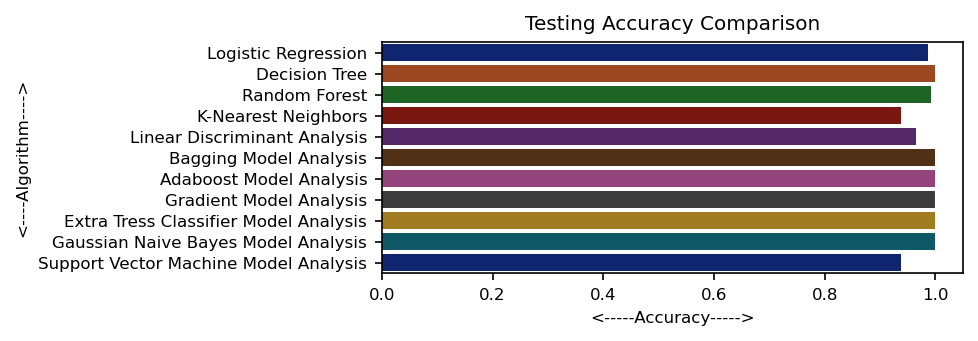

In [41]:
#Visual Representation of the ALGORITHMS 

plt.figure(figsize=[5,2],dpi = 150)
plt.title('Testing Accuracy Comparison')
plt.xlabel('<-----Accuracy----->')
plt.ylabel('<----Algorithm---->')
sns.barplot(x = algorithm_testing_accuracy , y = algorithm , palette='dark')

## ROC Curve 

[0] Logistic Regression Model
[1] Decision Tree Training Model
[2] Random Forest Training Model
[3] KNN Training Model
[4] LDA Training Model
[5] Bagging Training Model
[6] adaboost Training Model
[7] Gradient Training Model
[8] ExtraTreesClassifier Training Model
[9] Gaussian NB Training Model
[10] Support Vector Machine Training Model
Enter the 1st Model : 2
Enter the 2nd Model : 7


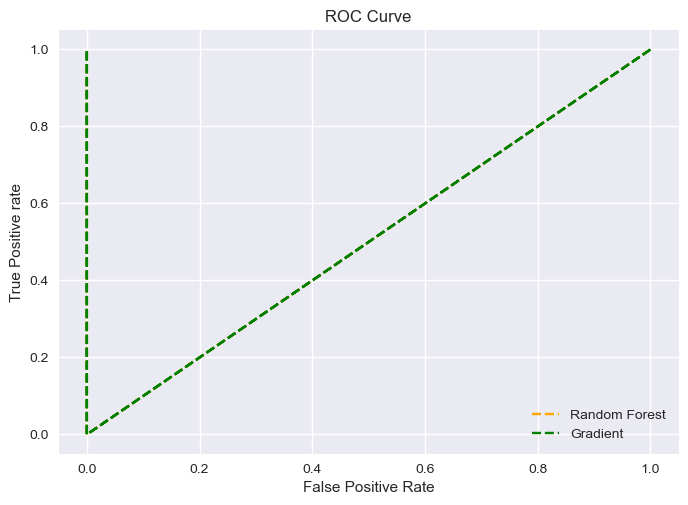

In [43]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

print("[0] Logistic Regression Model")
print("[1] Decision Tree Training Model")
print("[2] Random Forest Training Model")
print("[3] KNN Training Model")
print("[4] LDA Training Model")

print("[5] Bagging Training Model")
print("[6] adaboost Training Model")
print("[7] Gradient Training Model")
print("[8] ExtraTreesClassifier Training Model")

print("[9] Gaussian NB Training Model")
print("[10] Support Vector Machine Training Model")

p=int(input("Enter the 1st Model : "))
q=int(input("Enter the 2nd Model : "))

plt.title("ROC Curve")
# plot roc curves

if (p==0):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='orange', label='Logistic Regression')
elif (p==1):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='orange', label='Decision Tree')
elif (p==2):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='orange', label='Random Forest')
elif (p==3):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='orange', label='K-Nearest Neighbour')
elif (p==4):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='orange', label='Linear Discriminant Analysis')
elif (p==5):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='orange', label='Bagging')
elif (p==6):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='orange', label='adaboost')
elif (p==7):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='orange', label='Gradient')
elif (p==8):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='orange', label='ExtraTreesClassifier')
elif (p==9):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='orange', label='Gaussian NB')
elif (p==10):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='orange', label='Support Vector Machine')



if (q==0):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='green', label='Logistic Regression')
elif (q==1):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='green', label='Decision Tree')
elif (q==2):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='green', label='Random Forest')
elif (q==3):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='green', label='K-Nearest Neighbour')
elif (q==4):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='green', label='Linear Discriminant Analysis')
elif (q==5):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='green', label='Bagging')
elif (q==6):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='green', label='adaboost')
elif (q==7):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='green', label='Gradient')
elif (q==8):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='green', label='ExtraTreesClassifier')
elif (q==9):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='green', label='Gaussian NB')
elif (q==10):
  plt.plot(Y_test,model[p].predict(X_test), linestyle='--',color='green', label='Support Vector Machine')



##################

# plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()
##################
print()

## Using K-Means Clustering 

Note that K-Means Clustering is not a classification algorithm, but rather a clustering algorithm that tries to group similar data points together. In this code, we use K-Means Clustering to cluster the data into two clusters, and then use the majority label of each cluster to predict the binary classification labels for the test set. This approach is not optimal for this dataset, but is included here for illustrative purposes.

In [44]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
heart_disease_data = pd.read_csv('Breast_Cancer_Wisconsin_processed_data.csv')

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(heart_disease_data.drop('diagnosis', axis=1),
                                                    heart_disease_data['diagnosis'],
                                                    test_size=0.2,
                                                    random_state=42)



# Define the K-Means Clustering model
km_model = KMeans(n_clusters=2, random_state=42)

# Train the K-Means Clustering model
km_model.fit(X_train,y_train)

# # Training Score
# train_kMeans_Score=km_model.score(X_train,y_train)
# print(f'Training Accuracy: {train_kMeans_Score:.3f}')

###########
# Predict cluster labels for training and testing sets
train_labels = km_model.predict(X_train)
test_labels = km_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, train_labels)
test_accuracy = accuracy_score(y_test, test_labels)
###########


# Use the K-Means Clustering model to predict the test set labels
y_pred = km_model.predict(X_test)

# Convert the predicted cluster labels to binary classification labels
y_pred_binary = np.where(y_pred == np.bincount(y_pred).argmax(), 1, 0)

# Evaluate the model on the test set
acc = accuracy_score(y_test, y_pred)
print('Number of Points in Each Cluster:')
print(pd.Series(km_model.labels_).value_counts())
print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Testing Accuracy: {test_accuracy:.3f}')


Number of Points in Each Cluster:
0    355
1    100
dtype: int64
Training Accuracy: 0.844
Testing Accuracy: 0.877


##  ANN Model on Breast Cancer Dataset

In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('Breast_Cancer_Wisconsin_Data.csv')

# Assuming 'diagnosis' is the correct column name
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Convert 'diagnosis' to numeric format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Adjust input_dim to match the number of features in your dataset
input_dim = X.shape[1]

# Define the architecture of the neural network
model = Sequential()
model.add(Dense(16, input_dim=input_dim, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')



Epoch 1/500
7/7 [==============================] - 3s 105ms/step - loss: 1751192.8750 - accuracy: 0.6256 - val_loss: 2347959.2500 - val_accuracy: 0.5647
Epoch 2/500
7/7 [==============================] - 0s 22ms/step - loss: 1535754.1250 - accuracy: 0.6256 - val_loss: 2060371.7500 - val_accuracy: 0.5647
Epoch 3/500
7/7 [==============================] - 0s 18ms/step - loss: 1345961.0000 - accuracy: 0.6256 - val_loss: 1795632.0000 - val_accuracy: 0.5647
Epoch 4/500
7/7 [==============================] - 0s 22ms/step - loss: 1168015.2500 - accuracy: 0.6256 - val_loss: 1473806.3750 - val_accuracy: 0.5647
Epoch 5/500
7/7 [==============================] - 0s 21ms/step - loss: 869359.0625 - accuracy: 0.6256 - val_loss: 858728.1250 - val_accuracy: 0.5647
Epoch 6/500
7/7 [==============================] - 0s 21ms/step - loss: 487138.7188 - accuracy: 0.6256 - val_loss: 182955.4062 - val_accuracy: 0.5647
Epoch 7/500
7/7 [==============================] - 0s 19ms/step - loss: 99594.5703 - accura

Epoch 56/500
7/7 [==============================] - 0s 16ms/step - loss: 19854.4414 - accuracy: 0.4648 - val_loss: 39274.6250 - val_accuracy: 0.5529
Epoch 57/500
7/7 [==============================] - 0s 19ms/step - loss: 25539.6582 - accuracy: 0.6005 - val_loss: 12066.0645 - val_accuracy: 0.4353
Epoch 58/500
7/7 [==============================] - 0s 26ms/step - loss: 15368.1455 - accuracy: 0.4347 - val_loss: 16639.6465 - val_accuracy: 0.4353
Epoch 59/500
7/7 [==============================] - 0s 20ms/step - loss: 19148.8789 - accuracy: 0.4397 - val_loss: 24065.4258 - val_accuracy: 0.5529
Epoch 60/500
7/7 [==============================] - 0s 17ms/step - loss: 10499.1240 - accuracy: 0.5779 - val_loss: 8194.8252 - val_accuracy: 0.7412
Epoch 61/500
7/7 [==============================] - 0s 17ms/step - loss: 8000.6377 - accuracy: 0.5955 - val_loss: 20828.9316 - val_accuracy: 0.5765
Epoch 62/500
7/7 [==============================] - 0s 19ms/step - loss: 26000.5723 - accuracy: 0.4146 - val

7/7 [==============================] - 0s 19ms/step - loss: 102510.8672 - accuracy: 0.6256 - val_loss: 84579.2500 - val_accuracy: 0.5765
Epoch 112/500
7/7 [==============================] - 0s 23ms/step - loss: 29030.7109 - accuracy: 0.4925 - val_loss: 16825.3203 - val_accuracy: 0.4353
Epoch 113/500
7/7 [==============================] - 0s 36ms/step - loss: 26108.4551 - accuracy: 0.4548 - val_loss: 76481.8203 - val_accuracy: 0.5765
Epoch 114/500
7/7 [==============================] - 0s 26ms/step - loss: 44070.8047 - accuracy: 0.6281 - val_loss: 5532.5171 - val_accuracy: 0.4353
Epoch 115/500
7/7 [==============================] - 0s 41ms/step - loss: 45464.2109 - accuracy: 0.3744 - val_loss: 4244.2422 - val_accuracy: 0.5176
Epoch 116/500
7/7 [==============================] - 0s 22ms/step - loss: 38469.6172 - accuracy: 0.5955 - val_loss: 21463.4961 - val_accuracy: 0.6471
Epoch 117/500
7/7 [==============================] - 0s 16ms/step - loss: 15553.8516 - accuracy: 0.4196 - val_loss:

7/7 [==============================] - 0s 10ms/step - loss: 36736.8750 - accuracy: 0.3920 - val_loss: 58522.2344 - val_accuracy: 0.5882
Epoch 167/500
7/7 [==============================] - 0s 9ms/step - loss: 67678.5625 - accuracy: 0.6432 - val_loss: 85241.1328 - val_accuracy: 0.5765
Epoch 168/500
7/7 [==============================] - 0s 11ms/step - loss: 20690.0508 - accuracy: 0.5879 - val_loss: 22048.8301 - val_accuracy: 0.4353
Epoch 169/500
7/7 [==============================] - 0s 17ms/step - loss: 30793.5176 - accuracy: 0.4095 - val_loss: 27829.4941 - val_accuracy: 0.5765
Epoch 170/500
7/7 [==============================] - 0s 21ms/step - loss: 14649.7090 - accuracy: 0.5427 - val_loss: 24131.5371 - val_accuracy: 0.4353
Epoch 171/500
7/7 [==============================] - 0s 31ms/step - loss: 40788.4023 - accuracy: 0.3719 - val_loss: 45518.8359 - val_accuracy: 0.5647
Epoch 172/500
7/7 [==============================] - 0s 21ms/step - loss: 50641.0312 - accuracy: 0.6307 - val_loss:

Epoch 221/500
7/7 [==============================] - 0s 22ms/step - loss: 6821.0073 - accuracy: 0.4472 - val_loss: 17874.9727 - val_accuracy: 0.6706
Epoch 222/500
7/7 [==============================] - 0s 18ms/step - loss: 15385.8564 - accuracy: 0.6156 - val_loss: 9234.7148 - val_accuracy: 0.7529
Epoch 223/500
7/7 [==============================] - 0s 21ms/step - loss: 7081.7651 - accuracy: 0.5729 - val_loss: 6009.9209 - val_accuracy: 0.7412
Epoch 224/500
7/7 [==============================] - 0s 21ms/step - loss: 26151.9824 - accuracy: 0.6432 - val_loss: 7507.2456 - val_accuracy: 0.4471
Epoch 225/500
7/7 [==============================] - 0s 24ms/step - loss: 49256.9062 - accuracy: 0.3794 - val_loss: 10236.5186 - val_accuracy: 0.4471
Epoch 226/500
7/7 [==============================] - 0s 23ms/step - loss: 26830.9746 - accuracy: 0.5930 - val_loss: 55623.1172 - val_accuracy: 0.5882
Epoch 227/500
7/7 [==============================] - 0s 21ms/step - loss: 17612.3047 - accuracy: 0.5628 -

Epoch 276/500
7/7 [==============================] - 0s 14ms/step - loss: 37246.5742 - accuracy: 0.4422 - val_loss: 8718.4932 - val_accuracy: 0.4353
Epoch 277/500
7/7 [==============================] - 0s 14ms/step - loss: 11646.6562 - accuracy: 0.6156 - val_loss: 5001.9229 - val_accuracy: 0.4471
Epoch 278/500
7/7 [==============================] - 0s 13ms/step - loss: 5190.2749 - accuracy: 0.5226 - val_loss: 16252.7480 - val_accuracy: 0.4471
Epoch 279/500
7/7 [==============================] - 0s 14ms/step - loss: 19794.0332 - accuracy: 0.4422 - val_loss: 36203.2383 - val_accuracy: 0.5647
Epoch 280/500
7/7 [==============================] - 0s 13ms/step - loss: 20070.4980 - accuracy: 0.5704 - val_loss: 8884.1904 - val_accuracy: 0.4471
Epoch 281/500
7/7 [==============================] - 0s 26ms/step - loss: 21245.1035 - accuracy: 0.5729 - val_loss: 3302.6262 - val_accuracy: 0.4471
Epoch 282/500
7/7 [==============================] - 0s 21ms/step - loss: 12776.9961 - accuracy: 0.3894 -

Epoch 331/500
7/7 [==============================] - 0s 24ms/step - loss: 47678.3906 - accuracy: 0.5352 - val_loss: 16616.6211 - val_accuracy: 0.4353
Epoch 332/500
7/7 [==============================] - 0s 30ms/step - loss: 25532.7520 - accuracy: 0.5528 - val_loss: 64603.3594 - val_accuracy: 0.5882
Epoch 333/500
7/7 [==============================] - 0s 21ms/step - loss: 28992.9297 - accuracy: 0.6307 - val_loss: 18109.5332 - val_accuracy: 0.4353
Epoch 334/500
7/7 [==============================] - 0s 21ms/step - loss: 35578.2422 - accuracy: 0.3744 - val_loss: 11822.8994 - val_accuracy: 0.7412
Epoch 335/500
7/7 [==============================] - 0s 21ms/step - loss: 24126.9375 - accuracy: 0.6432 - val_loss: 19280.0762 - val_accuracy: 0.6941
Epoch 336/500
7/7 [==============================] - 0s 21ms/step - loss: 6594.3091 - accuracy: 0.4422 - val_loss: 20931.6855 - val_accuracy: 0.6706
Epoch 337/500
7/7 [==============================] - 0s 21ms/step - loss: 14870.7861 - accuracy: 0.63

Epoch 386/500
7/7 [==============================] - 0s 12ms/step - loss: 33089.6758 - accuracy: 0.6307 - val_loss: 18933.7793 - val_accuracy: 0.7059
Epoch 387/500
7/7 [==============================] - 0s 16ms/step - loss: 25120.1348 - accuracy: 0.4472 - val_loss: 3093.2876 - val_accuracy: 0.4471
Epoch 388/500
7/7 [==============================] - 0s 16ms/step - loss: 51541.1250 - accuracy: 0.5804 - val_loss: 120377.3984 - val_accuracy: 0.5765
Epoch 389/500
7/7 [==============================] - 0s 18ms/step - loss: 68628.2188 - accuracy: 0.6407 - val_loss: 37543.1016 - val_accuracy: 0.5882
Epoch 390/500
7/7 [==============================] - 0s 16ms/step - loss: 28161.3672 - accuracy: 0.4698 - val_loss: 10414.7188 - val_accuracy: 0.4353
Epoch 391/500
7/7 [==============================] - 0s 10ms/step - loss: 53836.2812 - accuracy: 0.5930 - val_loss: 75970.7266 - val_accuracy: 0.5882
Epoch 392/500
7/7 [==============================] - 0s 7ms/step - loss: 30036.0762 - accuracy: 0.58

Epoch 441/500
7/7 [==============================] - 0s 15ms/step - loss: 36765.4883 - accuracy: 0.6382 - val_loss: 43184.0078 - val_accuracy: 0.5882
Epoch 442/500
7/7 [==============================] - 0s 18ms/step - loss: 13326.9736 - accuracy: 0.4849 - val_loss: 15338.5693 - val_accuracy: 0.4353
Epoch 443/500
7/7 [==============================] - 0s 16ms/step - loss: 9927.9854 - accuracy: 0.4397 - val_loss: 50862.9062 - val_accuracy: 0.5647
Epoch 444/500
7/7 [==============================] - 0s 18ms/step - loss: 33305.0039 - accuracy: 0.6281 - val_loss: 3191.5376 - val_accuracy: 0.4353
Epoch 445/500
7/7 [==============================] - 0s 19ms/step - loss: 3971.8542 - accuracy: 0.3970 - val_loss: 9452.2705 - val_accuracy: 0.7294
Epoch 446/500
7/7 [==============================] - 0s 16ms/step - loss: 3275.3342 - accuracy: 0.5302 - val_loss: 537.9666 - val_accuracy: 0.4353
Epoch 447/500
7/7 [==============================] - 0s 16ms/step - loss: 11378.8633 - accuracy: 0.6608 - v

Epoch 496/500
7/7 [==============================] - 0s 21ms/step - loss: 24999.6152 - accuracy: 0.6533 - val_loss: 31559.8770 - val_accuracy: 0.6118
Epoch 497/500
7/7 [==============================] - 0s 18ms/step - loss: 6025.1333 - accuracy: 0.5804 - val_loss: 12155.4238 - val_accuracy: 0.4471
Epoch 498/500
7/7 [==============================] - 0s 18ms/step - loss: 9600.5264 - accuracy: 0.5603 - val_loss: 5531.5303 - val_accuracy: 0.4471
Epoch 499/500
7/7 [==============================] - 0s 19ms/step - loss: 9779.4668 - accuracy: 0.5779 - val_loss: 8969.3896 - val_accuracy: 0.7529
Epoch 500/500
3/3 [==============================] - 0s 13ms/step - loss: 21415.2148 - accuracy: 0.6860
Test loss: 21415.21484375 / Test accuracy: 0.6860465407371521
